# A PyTorch workflow model
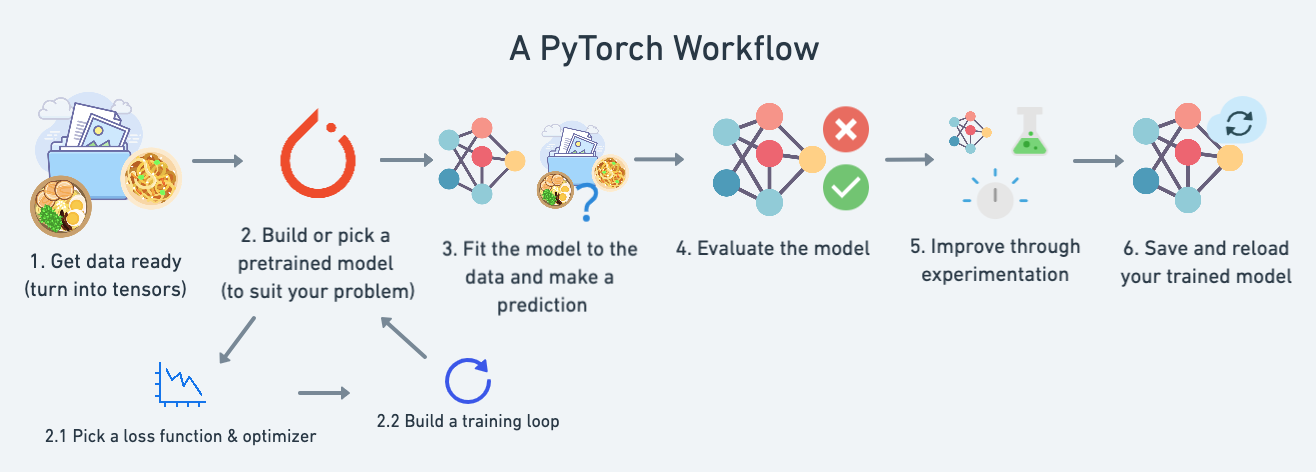

# https://www.learnpytorch.io/01_pytorch_workflow/


# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow
**Resources** :

**Ground Truth Notebook **: https://github.com/mrdbourke/pytorch-deep-learning
** Book Version of Notebook**: https://www.learnpytorch.io/01_pytorch_workflow/


**PyTorch nn documentation (from torch import nn)** -> https://pytorch.org/docs/stable/nn.html

In [ ]:
what_we_are_covering = {1 : "data (prepare and load)",
                        2 : "build model",
                        3 : "fitting the model to the data (training)",
                        4 : "making prediction and evaluating a mode (inference)",
                        5 : "saving and loading a model",
                        6 : "Putting it all together"}
what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making prediction and evaluating a mode (inference)',
 5: 'saving and loading a model',
 6: 'Putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch building blocks of Neural Networks
import matplotlib.pyplot as plt


# Check PyTorch Version
print(f"PyTorch Version : {torch.__version__}")

PyTorch Version : 2.5.1+cu121


# Creating a Simple Dataset Using the Linear Regression Formula

# 1. Data (Preparing and Loading)

Data can be almost anything... in Machine Learning
* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data)
* Audio like songs or podcasts
* DNA  
* Text

Machine learning is a game of two parts:
 1. Get data into a numerical representation.
 2. Build a model to learn patterns in that numerical representation.

 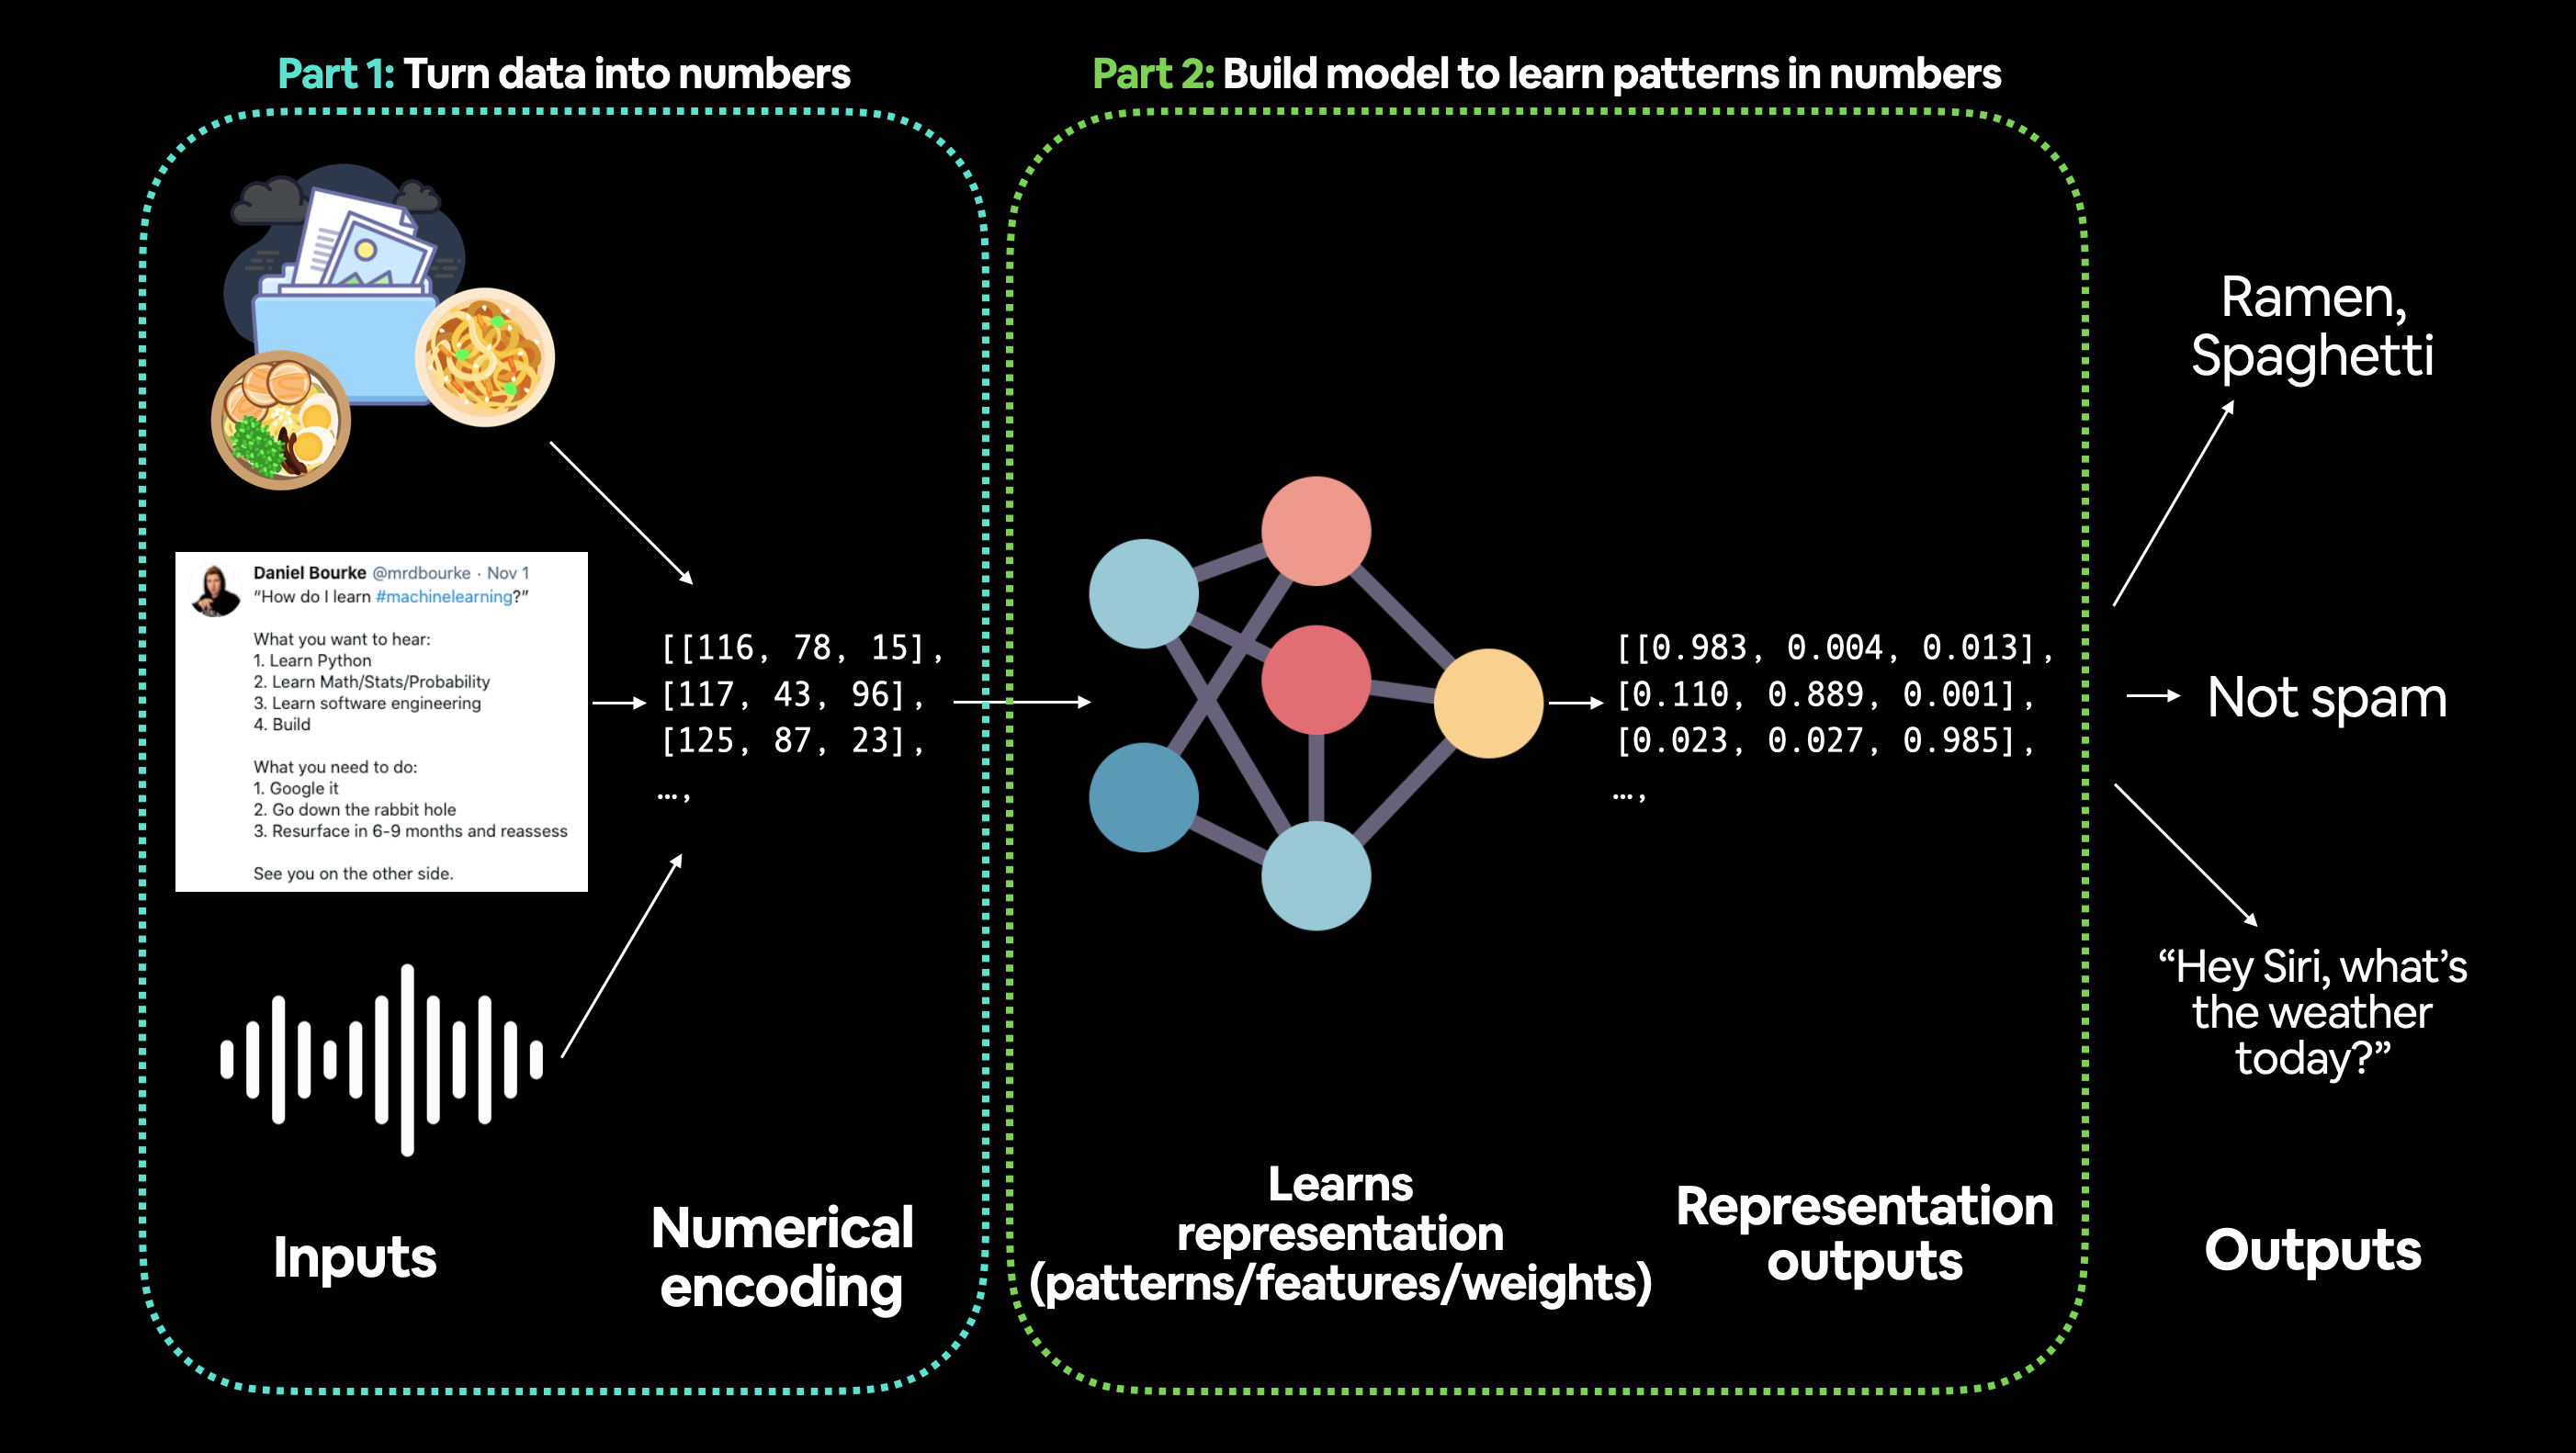

To showcase this, let's create some *known* data using the linear regression formula.
**Y = a + bX**

### We will use a linear regression formula to make a straight line with **known** parameters

In [ ]:
# Create *known* parameter

import torch

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)


(50, 50)

# Splitting Our Data into Training and Test Sets (one of the most important conceots in machine learning in general)

Let's create a training and test set with our data.





In [ ]:
# Create a Train/Test split

train_split = int(0.8*len(X))
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Building a function to Visualize Our Data

This is where data explorer's motto comes in !


In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
  """
  Plot training data, test data and compares predictions
  """

  plt.figure(figsize =(10,7))

  # Plot training data
  plt.scatter(train_data, train_label, c = "g", s = 4, label ="Training Data")

  # Plot test data in blue
  plt.scatter(test_data, test_label, c = "r", s = 4, label = "Test Data")

  # Are there predictions
  if predictions != None:
    # PLot the prediction if they exists
    plt.scatter(test_data, predictions, c = "b", s = 4, label = "Predictions")

  # SHow the legends
  plt.legend(prop = {"size":14})



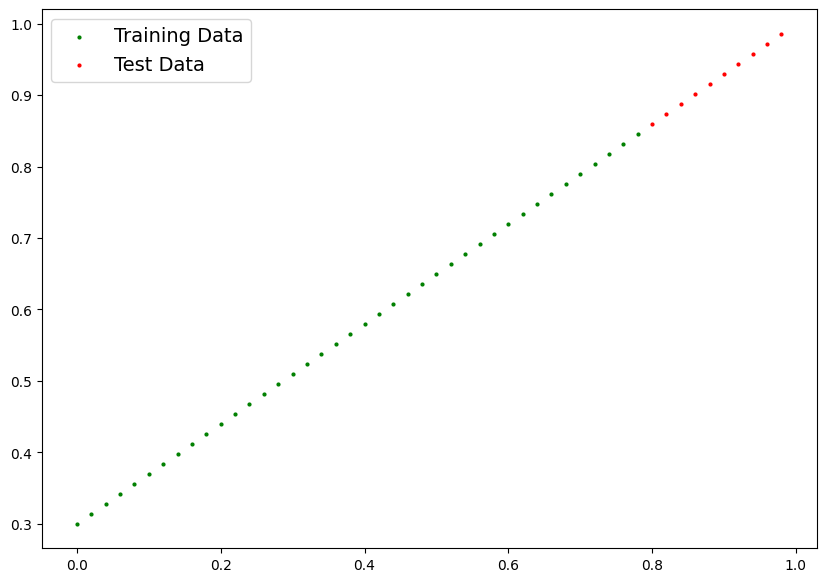

In [ ]:
plot_predictions()

# Building Our First PyTorch Model for Linear Regression

Resource to understand classes and OOPs concepts in Python
1. https://realpython.com/python3-object-oriented-programming/
2. https://docs.python.org/3/tutorial/classes.html


What our model does?
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal value (the weight & bias values we use to create model).


How does it do so?
Through two main algorithms:
1. Gradient Decent - https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2
2. Backpropogation - https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3

In [ ]:
# Create a Linear Regression model class
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, # <- start with a random weight and try to adjust it ti the ideal weight
                                           requires_grad = True, # <- can this parameter be updated via gradient descent?
                                           dtype = torch.float)) # <- PyTorch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.rand(1, # <- start with a random bias and try to adjust it ti the ideal weight
                                        requires_grad = True,# <- can this parameter be updated via gradient descent?
                                        dtype = torch.float))# <- PyTorch loves the datatype torch.float32

    # Forward Method to define computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor: # x is input data
    return self.weights * x + self.bias  ## This is the linear regression formula











# PyTorch Model Building Essentials

1. torch,nn -- Contains all of the building blocks for computational graphs (another word for neural networks)
2. torch.nn.Parameter -- what parameter should try and learn , often a PyTorch layer from torch.nn will set these for us
3. torch.nn.Module -- The base class for all neural network modules, if you subclass it, you should overwrite forward()
4. torch.optim -- this is where optimizers in PyTorch live, they will help with gradient descent
5. def forward() -- All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.


### Very IMP PyTorch Cheatsheet
https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of PyTorch models

We can check our model parameters or what's inside our model using -.parameters()



In [ ]:
# Create a random Seed

torch.manual_seed(42) # To avoid change of values

#create an instance of model we have created (This is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
model_0.parameters()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
weight, bias

(0.7, 0.3)

# Making Predictions with our Random Model Using Inference Mode -- torch.inference_mode()

To check our model's predictive power, let's see how well it predicts  y_test bsaed on x_test


When we pass data through our model, it's going to run it through the forward() method



In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [ ]:
# Make predictions with model -- Similar to above



with torch.no_grad():
  y_preds = model_0(X_test)
y_preds


tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

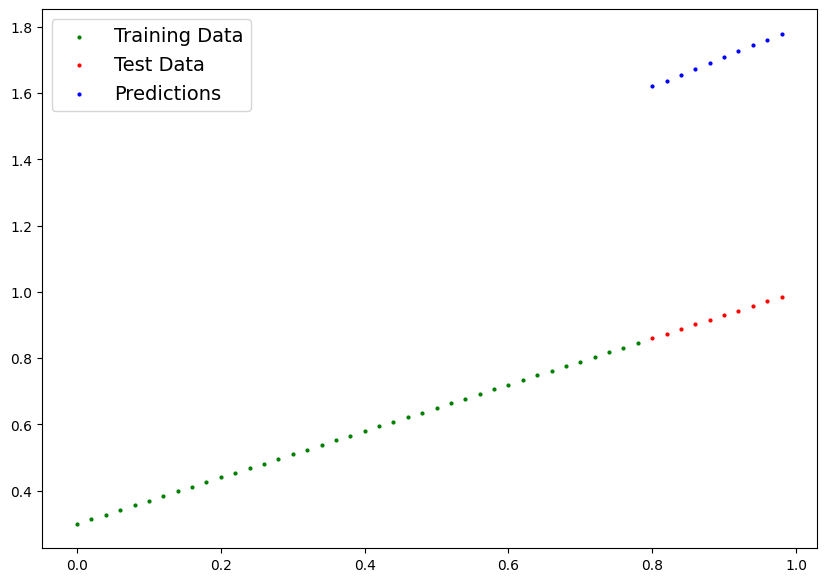

In [ ]:
plot_predictions(predictions = y_preds)

# Training a Model Intuition (The Things we need)

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how wrong your model predictions is to use loss functions.

* **Note : **
Loss function may be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

https://pytorch.org/docs/stable/nn.html#loss-functions


Things we need to train:

* **Loss function:** A function to measure how wrong your model predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g., weight & bias in our case) to improve the loss function.
  * Inside the optimizer you'll often have to set two parameters:
    * params - the model paramters you'd like to optimize, for example params = model_0.parameters()
    * lr (learning rate) - a small lr results in small changes, a large lr results in large changes

And specifically for PyTorch we need:
* A Training Loop
* A Testing Loop


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

# Setting up an Optimizer and a Loss Function

OPtimizer: https://pytorch.org/docs/stable/optim.html


In [ ]:
from torch.optim import SGD

# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01,
                            )



In [ ]:
loss_fn

L1Loss()

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problme (like ours), a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.

But for a classification problem like classifying whether a photo is of a dog or cat, you'll likely want to use a loss function of nn.BCELoss()  (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch


A couple of things we need in a training loop:
0. Loop through the data
1. Forward() pass (this involves data moving through our model's forward() to make predictions on data -- also called forward propogation).
2. Calculate the loss (comapre forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of the model w r t the loss (**backpropogation**)
5. Optimizer step - Use the optmizer to adjust our model's parameters to try and improve the loss (**gradient descent**).

**Note:** Gradient is a slope of a straight line
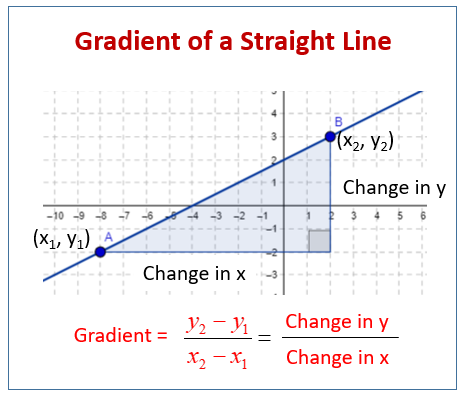

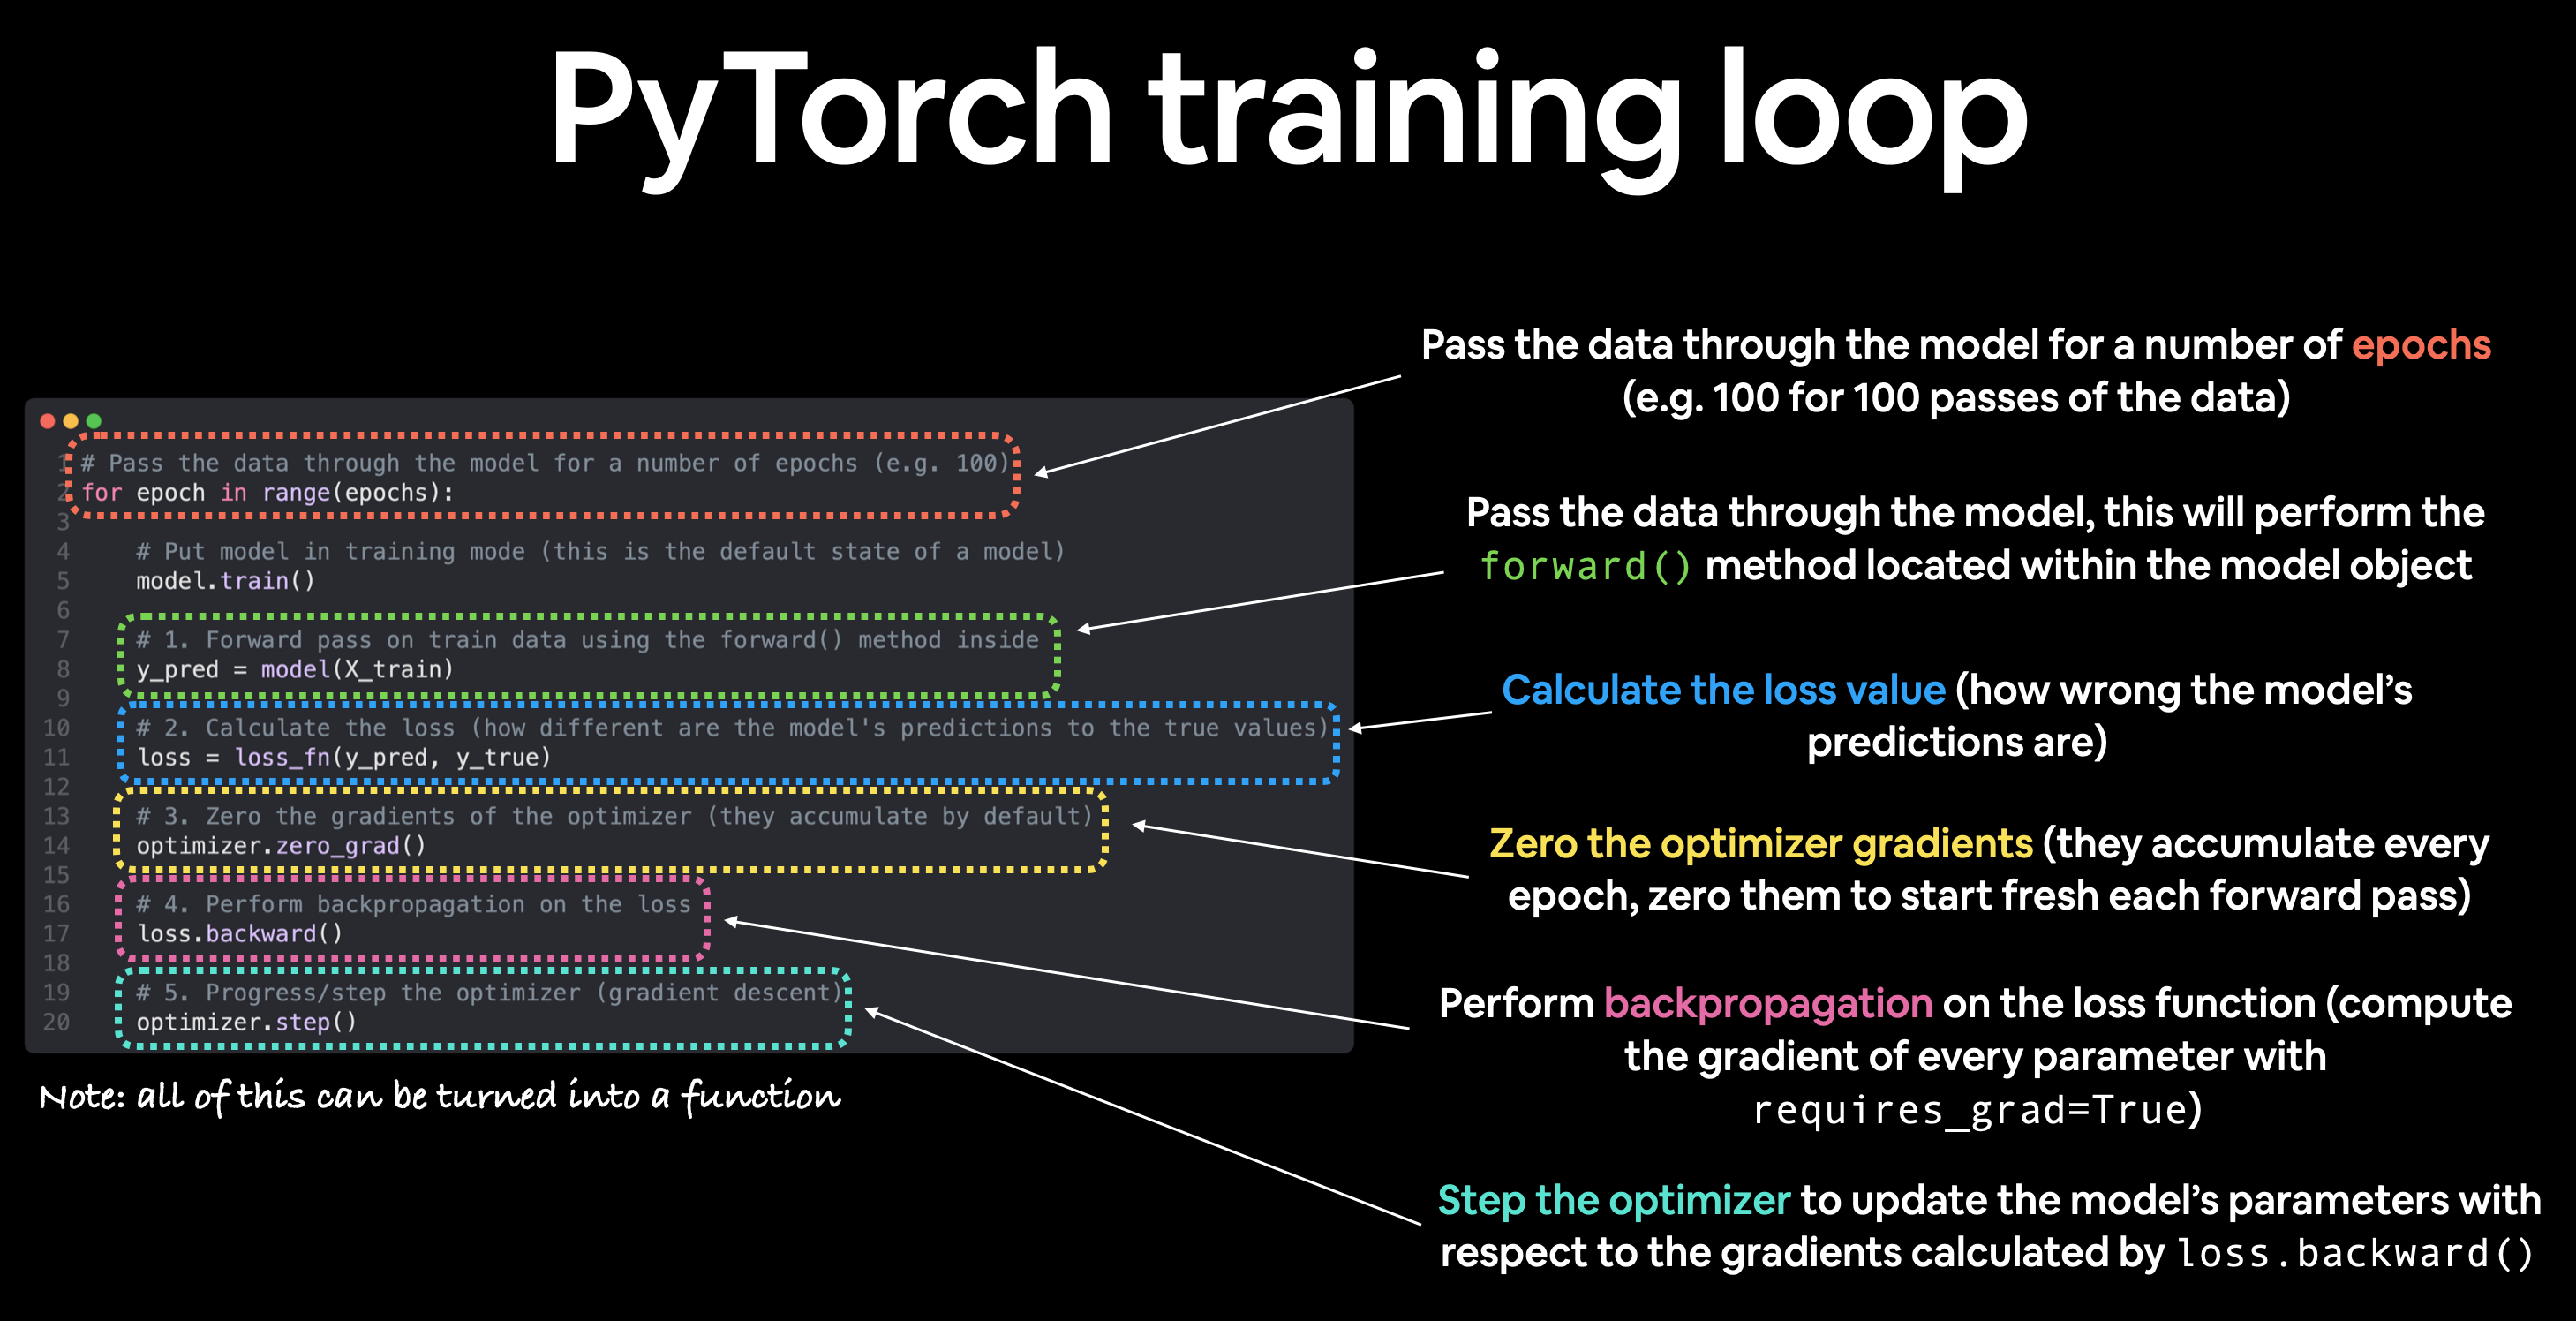

In [ ]:
# An epoch is one loop through the data ... (this is a hyperparameter because we've set it ourselves)
epochs = 100

# trach different values
epoch_count = []
loss_values = []
test_loss_values = []


### Training
# Step 0: Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients

  # Step 1: Forward pass
  y_pred = model_0(X_train)

  # Step 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss : {loss}")
  # Step 3. Optimizer zero grad
  optimizer.zero_grad()

  # Step 4. Backpropogation on the loss w r t the parameters of the model
  loss.backward() # by deafault how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  # Step 5. Step the optimizer (perform gradient descent)
  optimizer.step()


  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batchnorm layers)


  # Testing
  with torch.inference_mode(): # this turns of gradient tracking
    # 1. DO forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    # Print out model  state_dict()
  print(model_0.state_dict())





Loss : 0.6860889196395874
Epoch: 0 | Loss: 0.6860889196395874 | Test Loss: 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Loss : 0.6745679974555969
OrderedDict([('weights', tensor([0.8745])), ('bias', tensor([0.8950]))])
Loss : 0.6630470156669617
OrderedDict([('weights', tensor([0.8706])), ('bias', tensor([0.8850]))])
Loss : 0.6515260338783264
OrderedDict([('weights', tensor([0.8667])), ('bias', tensor([0.8750]))])
Loss : 0.6400049924850464
OrderedDict([('weights', tensor([0.8628])), ('bias', tensor([0.8650]))])
Loss : 0.6284840703010559
OrderedDict([('weights', tensor([0.8589])), ('bias', tensor([0.8550]))])
Loss : 0.6169630289077759
OrderedDict([('weights', tensor([0.8550])), ('bias', tensor([0.8450]))])
Loss : 0.6054420471191406
OrderedDict([('weights', tensor([0.8511])), ('bias', tensor([0.8350]))])
Loss : 0.5939210653305054
OrderedDict([('weights', tensor([0.8472])), ('bias', tensor([0.8250]))])
Loss : 0.5824000239372253
OrderedDict([('

Loss : 0.2943754196166992
Loss : 0.2828544080257416
Loss : 0.2713334262371063
Loss : 0.25981244444847107
Loss : 0.24829146265983582
Loss : 0.23677048087120056
Loss : 0.2252494841814041
Loss : 0.21372847259044647
Loss : 0.20220749080181122
Loss : 0.19068653881549835
Loss : 0.1791655272245407
Loss : 0.16764454543590546
Loss : 0.156123548746109
Loss : 0.14460256695747375
Loss : 0.1330815702676773
Loss : 0.12156059592962265
Loss : 0.1100396141409874
Loss : 0.09851861745119095
Loss : 0.0869976356625557
Loss : 0.07547664642333984
Loss : 0.06395565718412399
Loss : 0.05243467539548874
Loss : 0.04091368243098259
Loss : 0.029392695054411888
Loss : 0.017871711403131485
Loss : 0.010616960003972054
Loss : 0.009724985808134079
Loss : 0.009325616993010044
Loss : 0.00897279754281044
Loss : 0.008620461449027061
Loss : 0.008283796720206738
Loss : 0.007935261353850365
Loss : 0.007594785653054714
Loss : 0.007250060793012381
Loss : 0.00690577644854784
Loss : 0.0065648676827549934
Loss : 0.00621675467118620

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6932])), ('bias', tensor([0.3035]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

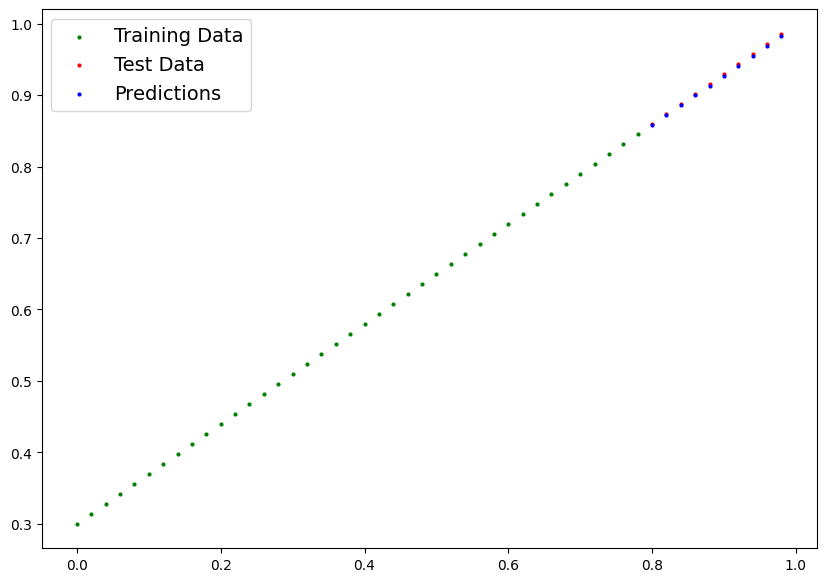

In [ ]:
plot_predictions(predictions=y_pred_new)

# Writing Testing Loop Code and Discussing What's Happening...

Backpropogation: https://brilliant.org/wiki/backpropagation/

In [ ]:
import numpy as np
loss_val_np = np.array(torch.tensor(loss_values).cpu().numpy())
test_loss_values_np = np.array(torch.tensor(test_loss_values).cpu().numpy())

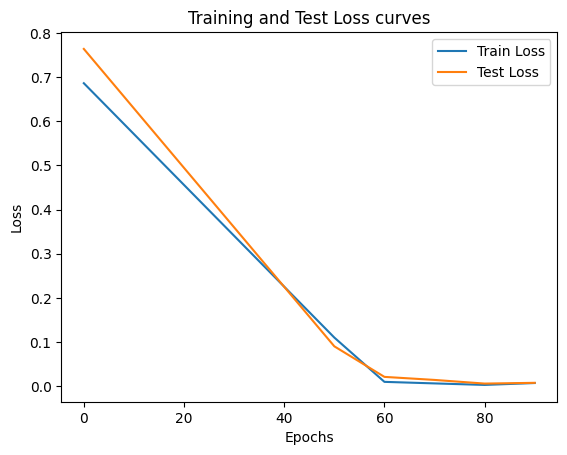

In [ ]:
# Plot the loss curves
import matplotlib.pyplot as plt
plt.plot(epoch_count, loss_val_np, label="Train Loss")
plt.plot(epoch_count, test_loss_values_np, label = "Test Loss")
plt.title("Training and Test Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

# Writing Code to Save a PyTorch Model
* **PyTorch save and load code:** https://pytorch.org/tutorials/beginner/saving_loading_models.html

There are three main methods you should know about for saving and loading models in PyTorch.

1. torch.save() -- allows you save a PyTorch object in a Python's pickle format -- https://docs.python.org/3/library/pickle.html
2. torch.load() -- allows you load a saved PyTorch object
3. torch.nn.Module.load_state_dict() -- allows to load model's saved state dictionary


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

# 2. Create model sav epath
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
print(f"SAVING MODEL TO: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

SAVING MODEL TO: models/01_pytorch_workflow_model.pth


In [ ]:
ls -l models

total 4
-rw-r--r-- 1 root root 1668 Dec 10 16:17 01_pytorch_workflow_model.pth


# Writing Code to Load a PyTorch Model


Since we saved our model's state_dict() rather than entire model, we will create a new instance of our model class and load the saved state_dict() into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
# To load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of saved model_0 this will update the new instance with updated parameters
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-76-3f319d825fdc>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
# Before loading it into saved model
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3829])), ('bias', tensor([0.9593]))])

In [ ]:
# AFter loading saved model
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
  loss = loss_fn(loaded_model_preds, y_test)

loaded_model_preds


tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [ ]:
# Compare loaded model preds with orginal model preds
y_pred_new == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
# Make some model preds

model_0.eval()
with torch.inference_mode():
  y_preds_test = model_0(X_test)

y_preds_test

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [ ]:
y_preds_test == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it All Together
Let's go back through the steps above and see it all in one place

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

# PyTorch Version
torch.__version__

'2.5.1+cu121'

# Create device-agnostic code

This means if we have got access GPU, our code will use it (for potentially faster computating).

If no GPU is available, the code will default to using CPU.

In [ ]:
# setup device agnostic code
device = "cude" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### 6.1 Data

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split the data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_prediction(train_data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_label = y_test,
                    predictions = None):

  plt.figure(figsize=(10,7))

  plt.plot(train_data, train_label, "b--", label = "Training Data")

  plt.plot(test_data, test_label, "g--", label = "Testing Data")

  if predictions is not None: # and predictions.any():
    plt.plot(test_data, predictions, "r--", label = "Predictions")

  plt.legend(prop = {"size":14})



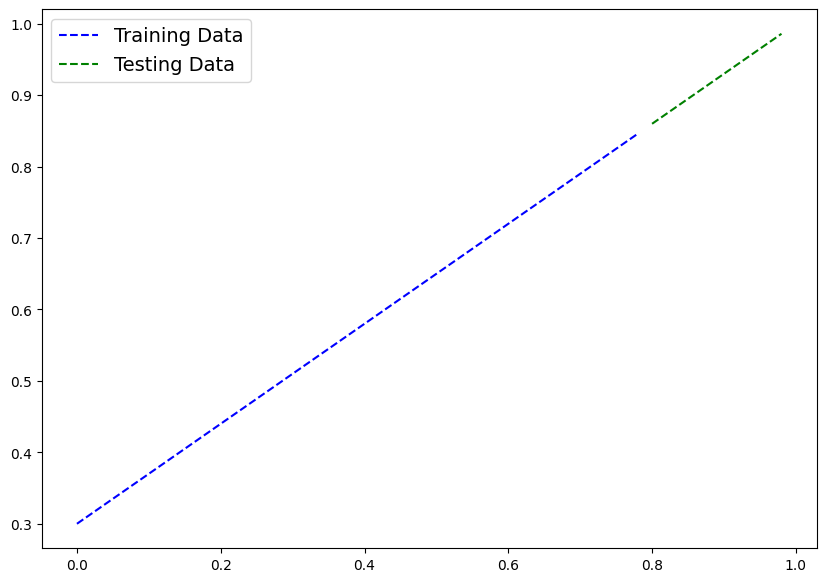

In [ ]:
# PLot the data
plot_prediction(X_train, y_train, X_test, y_test)

### 6.2 Building PyTorch Linear Model


In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1,
                                  bias = True)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss functions
* Optimizer
* Training loop
* Testing Loop

In [ ]:
# Setup the loss function
loss_fn = nn.L1Loss()

# Set up Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

# Let's write training loop
torch.manual_seed(42)

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 200
for epoch in range(epochs):
  model_1.train()

  # 1.Forward pass
  y_pred = model_1(X_train)

  # 2. Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, X_test)

  # Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}")


Epoch : 0 | Loss : 0.5551779866218567 | Test Loss : 0.6069762706756592
Epoch : 10 | Loss : 0.4399680495262146 | Test Loss : 0.4722663462162018
Epoch : 20 | Loss : 0.3247582018375397 | Test Loss : 0.33755654096603394
Epoch : 30 | Loss : 0.20954827964305878 | Test Loss : 0.2028467208147049
Epoch : 40 | Loss : 0.09433844685554504 | Test Loss : 0.06813689321279526
Epoch : 50 | Loss : 0.023886386305093765 | Test Loss : 0.023275602608919144
Epoch : 60 | Loss : 0.0199567973613739 | Test Loss : 0.021817971020936966
Epoch : 70 | Loss : 0.016517987474799156 | Test Loss : 0.019164394587278366
Epoch : 80 | Loss : 0.013089170679450035 | Test Loss : 0.01817154884338379
Epoch : 90 | Loss : 0.009653178043663502 | Test Loss : 0.019074415788054466
Epoch : 100 | Loss : 0.006215679459273815 | Test Loss : 0.021886223927140236
Epoch : 110 | Loss : 0.002787243574857712 | Test Loss : 0.02736755646765232
Epoch : 120 | Loss : 0.0012645035749301314 | Test Loss : 0.021345829591155052
Epoch : 130 | Loss : 0.001264

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### 6.4 Making and evaluating Predictions

In [ ]:
# Turn the model into evaluation mode

model_1.eval()

#Make prediction on test data
with torch.inference_mode():
  y_pred_test = model_1(X_test)

y_pred_test

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

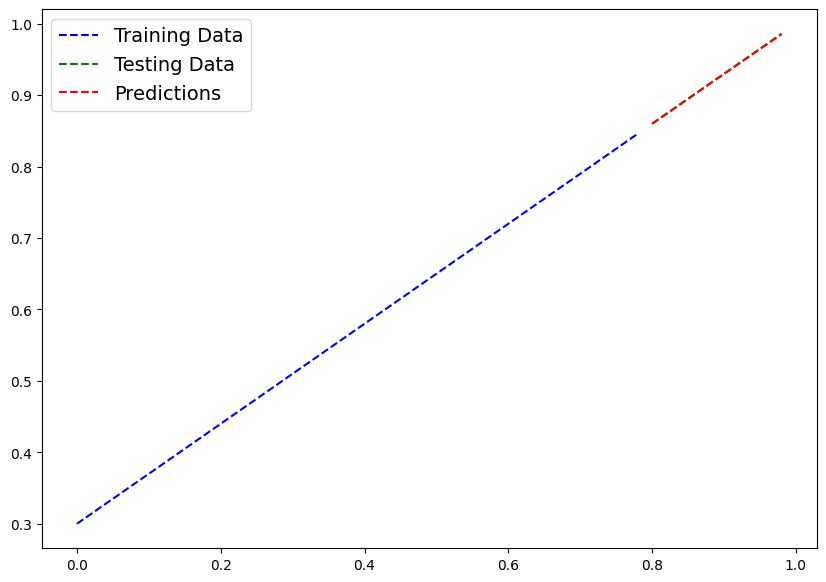

In [ ]:
# Check out our model predictions visually

plot_prediction(predictions = y_pred_test)

### 6.5 Saving and Loading trained model

In [ ]:
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("/content/sample_data/models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_02.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# save model and load
print((f"Saving model to: {MODEL_SAVE_PATH}"))
torch.save(obj=model_1.state_dict(),
           f = MODEL_SAVE_PATH)


Saving model to: /content/sample_data/models/01_pytorch_workflow_02.pth


In [ ]:
# Load a model
loaded_model_1 = LinearRegressionModelV2()


# Load the saved model_1 state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

<ipython-input-56-72d7c0bf4d90>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
loaded_model_1_preds
y_pred_test == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])